In [2]:
# Test - Data Preparation, Treatment, Manipulation and Analysis
# The observations and insights from the analysis were provided.

In [3]:
import pandas as pan
import numpy as num
import matplotlib.pyplot as mat

In [ ]:
# Data Preparation

In [4]:
# read the csv file from using the path sting and output it as a DataFrame using the read_csv()
# the na_filter parameter has been set to True to recognize whitespace as missing value

In [5]:
# relative path
str1 = ".\GBA_customers.csv"

In [6]:
df = pan.read_csv(str1, na_values=None, na_filter=True)

In [8]:
# head() function shows the first 5 rows

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000.0,39,Healthcare,1,4
1,2,Male,21,35000.0,81,Engineer,3,3
2,3,Female,20,86000.0,6,Engineer,1,1
3,4,Female,23,59000.0,77,Lawyer,0,2
4,5,Female,31,38000.0,40,Entertainment,2,6


In [10]:
# DataFrame.shape shows the shape of the DataFrame
# The DataFrame has 2000 rows and 8 columns according to the output

In [11]:
df.shape

(2000, 8)

In [12]:
# DataFrame.ndim shows the number of dimensions

In [13]:
df.ndim

2

In [14]:
# DataFrame.desribe() shows the statistics in descriptive form

In [15]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,1780.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110521.875843,50.962500,4.102500,3.768500
std,577.494589,28.429747,45661.760835,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74913.250000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110252.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,148800.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189709.000000,100.000000,17.000000,9.000000


In [16]:
# Data Treatment

In [17]:
# In pandas, missing data are bypassed during the computation process.
# Therefore, the computation result may not necessarily reflect the true picture (computation is carried out without using all dataset) and analysis based on missing data may lead to bias in the analysis.

# Processes like constructing models and forecasting cannot include missing data
# and have to be treated to avoid error during the computation process.

# The method used to treat the missing data can also affect the result of analysis. 
# If inappropriate methods are used, the computation may turn out to be biased and the analysis may be become unreliable.

In [18]:
# check for columns with missing values and sum them up

In [19]:
df.isna().agg(sum, axis=0)

CustomerID                  0
Gender                      1
Age                         0
Annual Income ($)         220
Spending Score (1-100)      0
Profession                 35
Work Experience             0
Family Size                 0
dtype: int64

In [20]:
# check for columns with zero values and sum them up

In [21]:
# count the variables with values == 0
# get dictionary of the variables with count values
df_dict = df.count().to_dict()
# get the list of variable names
col_list = df.columns
for data in col_list:
    con1 = (df[data] == 0)
    getvalues = df[con1]
    if len(getvalues) != 0:
        df_dict[data] = len(getvalues)
    else:
        df_dict[data] = 0

df_dict

{'CustomerID': 0,
 'Gender': 0,
 'Age': 24,
 'Annual Income ($)': 2,
 'Spending Score (1-100)': 2,
 'Profession': 0,
 'Work Experience': 431,
 'Family Size': 0}

In [22]:
# Summary:
# There are missing values in the "Gender", "Annual Income ($)" and "Profession" columns.
# There are zero values in "Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience" columns.

In [23]:
# find Annual Income with values == 0

In [24]:
# set condition
con1 = df["Annual Income ($)"].values == 0
# get the rows with Annual Income == 0
df_ai_zero = df[con1]
df_ai_zero

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
169,170,Male,32,0.0,63,Artist,2,2
246,247,Male,23,0.0,96,Doctor,1,3


In [25]:
# find Age with values == 0

In [26]:
# set condition
con1 = df["Age"].values == 0
# get the rows with Annual Income == 0
df_age_zero = df[con1]
df_age_zero

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
211,212,Female,0,22000.0,92,Artist,2,1
228,229,Male,0,33000.0,64,Marketing,1,1
333,334,Male,0,NaN,96,Artist,0,4
440,441,Female,0,57373.0,29,NaN,0,7
443,444,Female,0,68761.0,16,Lawyer,1,4
466,467,Male,0,186002.0,80,Doctor,15,2
559,560,Male,0,NaN,89,Artist,0,6
562,563,Female,0,NaN,25,Entertainment,8,1
767,768,Female,0,143910.0,22,Marketing,1,7
794,795,Female,0,147719.0,86,Lawyer,1,7


In [27]:
# find Gender with missing value
missing_gender_mask = pan.isna(df["Gender"].values)
missing_gender = df[["Gender"]][missing_gender_mask]
missing_gender

,Gender
220,NaN


In [28]:
# find Annual Income with missing value
missing_income_mask = pan.isna(df["Annual Income ($)"].values)
missing_income = df[["Annual Income ($)"]][missing_income_mask]
missing_income

,Annual Income ($)
15,NaN
16,NaN
17,NaN
18,NaN
19,NaN
...,...
1305,NaN
1306,NaN
1307,NaN
1308,NaN


In [29]:
# show the indices of the missing values in Annual Income
for ind, data in enumerate(missing_income.index):
    if (ind <= len(missing_income.index) - 2):
        print(data, end=", ")
    if (ind == len(missing_income.index) - 1):
        print(data)

15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 974, 975, 976, 977, 978, 979, 980, 1000, 1001, 1002, 1003, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1

In [30]:
# find Profession with missing value
missing_profession_mask = pan.isna(df["Profession"].values)
missing_profession = df[["Profession"]][missing_profession_mask]
missing_profession

,Profession
79,NaN
118,NaN
219,NaN
237,NaN
437,NaN
440,NaN
498,NaN
545,NaN
601,NaN
641,NaN


In [31]:
# show the indices of the missing values in profession
missing_profession.index

Int64Index([  79,  118,  219,  237,  437,  440,  498,  545,  601,  641,  665,
             703,  801,  817,  850,  903,  927, 1009, 1067, 1088, 1092, 1188,
            1223, 1316, 1334, 1384, 1417, 1483, 1506, 1625, 1634, 1788, 1884,
            1905, 1932],
           dtype='int64')

In [32]:
# The effect of not treating missing data properly
mean1 = df[["Annual Income ($)"]].mean()
mean2 = df[["Annual Income ($)"]].fillna(0).mean()
mean_diff = mean1 - mean2
mean_diff

Annual Income ($)    12157.406343
dtype: float64

In [33]:
# Summary:
# As you can see from the result above, the difference between the mean value of treated data and untreated data is 12157.41.
# The difference is quite big and it will affect the final analysis.

In [35]:
# Missing data can be treated in the following ways:
# 1. Delete the missing data entirely
# 2. Delete data that are deemed not appropriate
# 3. Replace missing data with other values
# 4. Bypass the missing data entirely (Not recommended)

In [36]:
# Next, we are going to locate the missing data and treat them accordingly.

# For the Profession, we are going to include another category, "Others".

# For the Gender, there is one missing value. Since the number is small and it is really not possible 
# to make deduction based on any data, we will remove the data.

# For the Annual Income, we are going to replace the missing data with mean values based on the various professions.

In [37]:
# We are going to create another column known as "Age Group" with three groups of data.
# The three groups of data will be based on the column "Age"

In [38]:
# There are missing values in the "Gender", "Annual Income ($)" and "Profession" columns.

# Next, we are going to locate the missing data and treat them accordingly.

# We are going to replace all missing data with 0.

# For the Profession, we are going to include another category, "others".

# For the Annual Income, we are going to replace the missing data with mean values based on the profession.

# For the Gender, there is one missing value. Since the number is small and it is really not possible 
# to make deduction based on any data, we will remove the data.

In [39]:
# Replace all missing values with 0
# Replace all missing values in profession with a new category, "others"
# Replace all missing values in annual income with mean values according to the profession
# Delete the missing gender value

# Exclude the Age with values less than 18 years old
# Create a new column Age Group.
# Based on column Age, group the age information into three groups under Age Group

In [40]:
# create a copy df_rep
df_rep = df.copy()

In [41]:
# replace all missing data with the value 0
df_rep = df_rep.fillna(0)

In [42]:
# save to csv file
df_rep.to_csv("df_replace_with_zeros.csv")

In [43]:
# create boolean mask for Profession with value == 0
con1 = df_rep["Profession"] == 0

In [44]:
# replace data with value == 0 with value == "others" 
df_rep.iloc[0:,5][con1] = "Others"

In [45]:
# save to csv file
df_rep.to_csv("df_replace_profession_with_others.csv")

In [46]:
# find the mean income for all the profession

In [47]:
# find the profession categories

In [48]:
profession_category_list = df_rep["Profession"].unique()
profession_category_list

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Others'],
      dtype=object)

In [49]:
# find mean income for Healthcare

In [50]:
Healthcare_select = df_rep["Profession"] == "Healthcare"
Healthcare_mean = df_rep["Annual Income ($)"][Healthcare_select].mean()
Healthcare_mean

95626.62241887905

In [51]:
# find mean income for Engineer

In [52]:
Engineer_select = df_rep["Profession"] == "Engineer"
Engineer_mean = df_rep["Annual Income ($)"][Engineer_select].mean()
Engineer_mean

96321.82681564246

In [53]:
# find mean income for Lawyer

In [54]:
Lawyer_select = df_rep["Profession"] == "Lawyer"
Lawyer_mean = df_rep["Annual Income ($)"][Lawyer_select].mean()
Lawyer_mean

100764.73943661971

In [55]:
# find mean income for Entertainment

In [56]:
Entertainment_select = df_rep["Profession"] == "Entertainment"
Entertainment_mean = df_rep["Annual Income ($)"][Entertainment_select].mean()
Entertainment_mean

97975.68376068377

In [57]:
# find mean income for Artist

In [58]:
Artist_select = df_rep["Profession"] == "Artist"
Artist_mean = df_rep["Annual Income ($)"][Artist_select].mean()
Artist_mean

96294.99673202615

In [59]:
# find mean income for Executive
Executive_select = df_rep["Profession"] == "Executive"
Executive_mean = df_rep["Annual Income ($)"][Executive_select].mean()
Executive_mean

109625.54248366013

In [60]:
# find mean income for Doctor
Doctor_select = df_rep["Profession"] == "Doctor"
Doctor_mean = df_rep["Annual Income ($)"][Doctor_select].mean()
Doctor_mean

98583.94409937889

In [61]:
# find mean income for Homemaker
Homemaker_select = df_rep["Profession"] == "Homemaker"
Homemaker_mean = df_rep["Annual Income ($)"][Homemaker_select].mean()
Homemaker_mean

97522.43333333333

In [62]:
# find mean income for Marketing
Marketing_select = df_rep["Profession"] == "Marketing"
Marketing_mean = df_rep["Annual Income ($)"][Marketing_select].mean()
Marketing_mean

100379.96470588235

In [63]:
# find mean income for Others
Others_select = df_rep["Profession"] == "Others"
Others_mean = df_rep["Annual Income ($)"][Others_select].mean()
Others_mean

110688.57142857143

In [64]:
# Assign the mean values according to the profession

In [65]:
# Healthcare
con1 = df_rep["Annual Income ($)"] == 0
Healthcare_select = Healthcare_select & con1
df_rep.loc[0:,"Annual Income ($)"][Healthcare_select] = Healthcare_mean

In [66]:
# Engineer
con2 = df_rep["Annual Income ($)"] == 0
Engineer_select = Engineer_select & con2
df_rep.loc[0:,"Annual Income ($)"][Engineer_select] = Engineer_mean

In [67]:
# Lawyer
con3 = df_rep["Annual Income ($)"] == 0
Lawyer_select = Lawyer_select & con3
df_rep.loc[0:,"Annual Income ($)"][Lawyer_select] = Lawyer_mean

In [68]:
# Entertainment
con4 = df_rep["Annual Income ($)"] == 0
Entertainment_select = Entertainment_select & con4
df_rep.loc[0:,"Annual Income ($)"][Entertainment_select] = Entertainment_mean

In [69]:
# Artist
con5 = df_rep["Annual Income ($)"] == 0
Artist_select = Artist_select & con5
df_rep.loc[0:,"Annual Income ($)"][Artist_select] = Artist_mean

In [70]:
# Excutive
con6 = df_rep["Annual Income ($)"] == 0
Executive_select = Executive_select & con6
df_rep.loc[0:,"Annual Income ($)"][Executive_select] = Executive_mean

In [71]:
# Doctor
con7 = df_rep["Annual Income ($)"] == 0
Doctor_select = Doctor_select & con7
df_rep.loc[0:,"Annual Income ($)"][Doctor_select] = Doctor_mean

In [72]:
# Homemaker
con8 = df_rep["Annual Income ($)"] == 0
Homemaker_select = Homemaker_select & con8
df_rep.loc[0:,"Annual Income ($)"][Homemaker_select] = Homemaker_mean

In [73]:
# Marketing 
con9 = df_rep["Annual Income ($)"] == 0
Marketing_select = Marketing_select & con9
df_rep.loc[0:,"Annual Income ($)"][Marketing_select] = Marketing_mean

In [74]:
# Others
con10 = df_rep["Annual Income ($)"] == 0
Others_select = Others_select & con10
df_rep.loc[0:,"Annual Income ($)"][Others_select] = Others_mean

In [75]:
df_rep

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000.0,39,Healthcare,1,4
1,2,Male,21,35000.0,81,Engineer,3,3
2,3,Female,20,86000.0,6,Engineer,1,1
3,4,Female,23,59000.0,77,Lawyer,0,2
4,5,Female,31,38000.0,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387.0,40,Artist,8,7
1996,1997,Female,91,73158.0,32,Doctor,7,7
1997,1998,Male,87,90961.0,14,Healthcare,9,2
1998,1999,Male,77,182109.0,4,Executive,7,2


In [76]:
df_rep.to_csv("df_repl_with_annual_income.csv")

In [77]:
# delete the missing gender value

In [78]:
con1 = df_rep["Gender"] == 0
index1 = df_rep["Gender"][con1].index
print(index1)
df_rep = df_rep.drop(labels=index1)
df_rep.to_csv("df_rep1_delete_missing_gender.csv")

Int64Index([220], dtype='int64')


In [79]:
df_rep

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000.0,39,Healthcare,1,4
1,2,Male,21,35000.0,81,Engineer,3,3
2,3,Female,20,86000.0,6,Engineer,1,1
3,4,Female,23,59000.0,77,Lawyer,0,2
4,5,Female,31,38000.0,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387.0,40,Artist,8,7
1996,1997,Female,91,73158.0,32,Doctor,7,7
1997,1998,Male,87,90961.0,14,Healthcare,9,2
1998,1999,Male,77,182109.0,4,Executive,7,2


In [80]:
# Data Analysis with Visualization

In [81]:
# We are going to plot based on Age and Spending

In [82]:
# exclude Age less than 18 years old
# https://en.wikipedia.org/wiki/Legal_working_age

In [83]:
# set condition to filter out ages that are less than 18 years old
# We decided to filter out these data because it doesn’t make sense 
# for someone less than 18 years old to be in employment.
con1 = df_rep["Age"] >= 18
df_rep = df_rep.loc[con1].reset_index()

In [84]:
# create a new column "Age Group" based on "Age"
df_rep["Age Group"] = ""
# df_rep.to_csv("df_rep_Age_Group.csv")

In [85]:
# set Age Group into 3 groups

In [86]:
# set conditions to filter the ages according to the three groups
con1 = (df_rep["Age"] > 17) & (df_rep["Age"] < 36)
con2 = (df_rep["Age"] >= 36) & (df_rep["Age"] <= 55)
con3 = (df_rep["Age"] > 55)

In [87]:
# assign the string values to the "Age Group" column
df_rep.loc[0:, "Age Group"][con1] = "<36"
df_rep.loc[0:, "Age Group"][con2] = "36to55"
df_rep.loc[0:, "Age Group"][con3] = ">55"

In [88]:
df_rep

,index,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Group
0,0,1,Male,19,15000.0,39,Healthcare,1,4,<36
1,1,2,Male,21,35000.0,81,Engineer,3,3,<36
2,2,3,Female,20,86000.0,6,Engineer,1,1,<36
3,3,4,Female,23,59000.0,77,Lawyer,0,2,<36
4,4,5,Female,31,38000.0,40,Entertainment,2,6,<36
...,...,...,...,...,...,...,...,...,...,...
1662,1995,1996,Female,71,184387.0,40,Artist,8,7,>55
1663,1996,1997,Female,91,73158.0,32,Doctor,7,7,>55
1664,1997,1998,Male,87,90961.0,14,Healthcare,9,2,>55
1665,1998,1999,Male,77,182109.0,4,Executive,7,2,>55


In [89]:
df_rep.to_csv("df_rep.csv")

In [91]:
import matplotlib.pyplot as mat

In [92]:
# # Based on replaced missing values in DataFrame
# 1. Find the mean spending score based on Gender using the treated dataset.

In [93]:
# get the gender data

In [94]:
gender = df_rep[["Gender"]].describe()
gender

,Gender
count,1667
unique,2
top,Female
freq,988


In [95]:
# get the mean values
gender_spending = df_rep.groupby(["Gender"]).mean()
gender_spending = gender_spending.sort_values(by="Spending Score (1-100)", ascending=False).reset_index()
gender_spending

,Gender,index,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,Female,979.395749,980.395749,56.899798,107433.229276,50.876518,3.934211,3.706478
1,Male,985.244477,986.244477,57.248895,108310.698809,49.543446,4.162003,3.823270


In [96]:
# create the DataFrame for Gender and Spending Score
gender_spending_sel = gender_spending.drop(["CustomerID","Age","Annual Income ($)","Work Experience","Family Size","index"], axis=1)
gender_spending_sel.index = gender_spending_sel["Gender"].tolist()
gender_spending_sel = gender_spending_sel.drop(["Gender"],axis=1)
gender_spending_sel

,Spending Score (1-100)
Female,50.876518
Male,49.543446


In [97]:
# get the count values
gender_count = df_rep.groupby(["Gender"]).count()
gender_count = gender_count.sort_values(by="Spending Score (1-100)", ascending=False).reset_index()
gender_count

,Gender,index,CustomerID,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Group
0,Female,988,988,988,988,988,988,988,988,988
1,Male,679,679,679,679,679,679,679,679,679


In [98]:
# create the DataFrame for Gender and Count
gender_count_sel = gender_count.drop(["CustomerID","Age","Annual Income ($)","Work Experience","Family Size","Profession","index","Age Group"], axis=1).rename({"Spending Score (1-100)":"Count"}, axis="columns")
gender_count_sel.index = gender_count_sel["Gender"].tolist()
gender_count_sel = gender_count_sel.drop(["Gender"],axis=1)
gender_count_sel

,Count
Female,988
Male,679


In [99]:
# Summary :
# Female customers tend to spend more than male customers
# Female customers made up the larger number of customers

In [100]:
# plot bar chart based on Gender and Spending

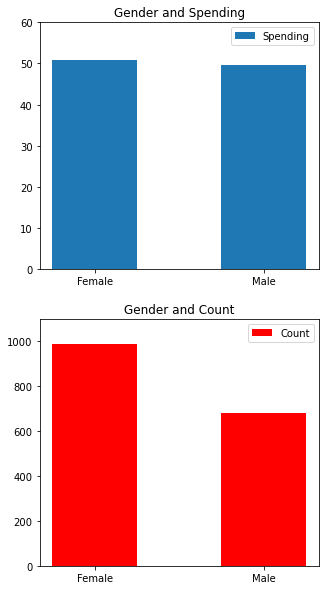

In [101]:
# plot the bar charts
fig, axes = mat.subplots(nrows=2, ncols=1, figsize=(5,10))

axes[0,].set_title("Gender and Spending")
axes[0,].bar(gender_spending_sel.index, gender_spending_sel["Spending Score (1-100)"], width=0.5)
axes[0,].set_ylim(0,60)
axes[1,].set_title("Gender and Count")
axes[1,].bar(gender_count_sel.index, gender_count_sel["Count"], width=0.5, color="r")
axes[1,].set_ylim(0, 1100)
axes[0,].legend(["Spending"], loc="upper right")
axes[1,].legend(["Count"], loc="upper right")

mat.show(block=None)

In [ ]:
# Insights
"""
Based on the findings, the company should cater their products and services with a slight bias towards female customers.
"""

In [102]:
# We are going to plot based on Profession and Spending

In [103]:
# Based on replaced missing values in DataFrame
# 2a. Find the mean spending score based on Profession.

In [104]:
# get the profession data

In [105]:
# get the mean values
group_spending = df_rep.groupby(["Profession"]).mean()
group_spending = group_spending.sort_values(by="Spending Score (1-100)", ascending=False).reset_index()
group_spending

,Profession,index,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,Entertainment,1051.436548,1052.436548,59.319797,108476.316543,52.461929,3.385787,3.842640
1,Artist,977.651072,978.651072,56.707602,105822.935284,52.284600,4.118908,3.653021
2,Healthcare,946.245552,947.245552,55.779359,108097.420433,49.807829,3.868327,3.846975
3,Executive,1057.484127,1058.484127,54.857143,114384.248055,49.047619,4.301587,4.031746
4,Engineer,929.949045,930.949045,61.522293,108006.019464,49.012739,3.891720,3.598726
5,Marketing,1006.264706,1007.264706,54.970588,105137.173356,48.970588,4.352941,3.647059
6,Doctor,1001.472441,1002.472441,57.220472,108759.600137,48.937008,4.118110,3.700787
7,Lawyer,916.228814,917.228814,56.000000,106210.929279,48.491525,3.381356,3.525424
8,Others,1000.066667,1001.066667,60.233333,112987.938095,45.533333,4.866667,4.400000
9,Homemaker,981.720000,982.720000,52.940000,108018.692000,44.900000,6.580000,4.140000


In [106]:
# get the DataFrame for Profession and Spending
group_spending_sel = group_spending.drop(["CustomerID","Age","Annual Income ($)","Work Experience","Family Size","index"], axis=1)
group_spending_sel.index = group_spending_sel["Profession"].tolist()
group_spending_sel = group_spending_sel.drop(["Profession"], axis=1)
group_spending_sel

,Spending Score (1-100)
Entertainment,52.461929
Artist,52.284600
Healthcare,49.807829
Executive,49.047619
Engineer,49.012739
Marketing,48.970588
Doctor,48.937008
Lawyer,48.491525
Others,45.533333
Homemaker,44.900000


In [107]:
# Summary :
# The top 5 groups of buyer based on profession spending score are Entertainment, Artist, Healthcare, Executive and Engineer respectively.

In [108]:
# 2b. Find the count based on Profession.

In [109]:
# get the data

In [110]:
# get the count values
group_count = df_rep.groupby(["Profession"]).count().rename({"CustomerID":"Count"}, axis=1)
group_count = group_count.sort_values(by="Spending Score (1-100)", ascending=False).reset_index()
group_count

,Profession,index,Count,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Age Group
0,Artist,513,513,513,513,513,513,513,513,513
1,Healthcare,281,281,281,281,281,281,281,281,281
2,Entertainment,197,197,197,197,197,197,197,197,197
3,Engineer,157,157,157,157,157,157,157,157,157
4,Doctor,127,127,127,127,127,127,127,127,127
5,Executive,126,126,126,126,126,126,126,126,126
6,Lawyer,118,118,118,118,118,118,118,118,118
7,Marketing,68,68,68,68,68,68,68,68,68
8,Homemaker,50,50,50,50,50,50,50,50,50
9,Others,30,30,30,30,30,30,30,30,30


In [111]:
# get the DataFrame based on Profession and Count
group_count_sel = group_count.drop(["Gender","Age","Annual Income ($)","Work Experience","Family Size","Spending Score (1-100)","index","Age Group"], axis=1)
group_count_sel.index = group_count_sel["Profession"].tolist()
group_count_sel = group_count_sel.drop(["Profession"], axis=1)
group_count_sel

,Count
Artist,513
Healthcare,281
Entertainment,197
Engineer,157
Doctor,127
Executive,126
Lawyer,118
Marketing,68
Homemaker,50
Others,30


In [112]:
# Summary :
# The top 5 biggest groups based on profession count are Artist, Healthcare, Entertainment, Engineer and Doctor respectively.

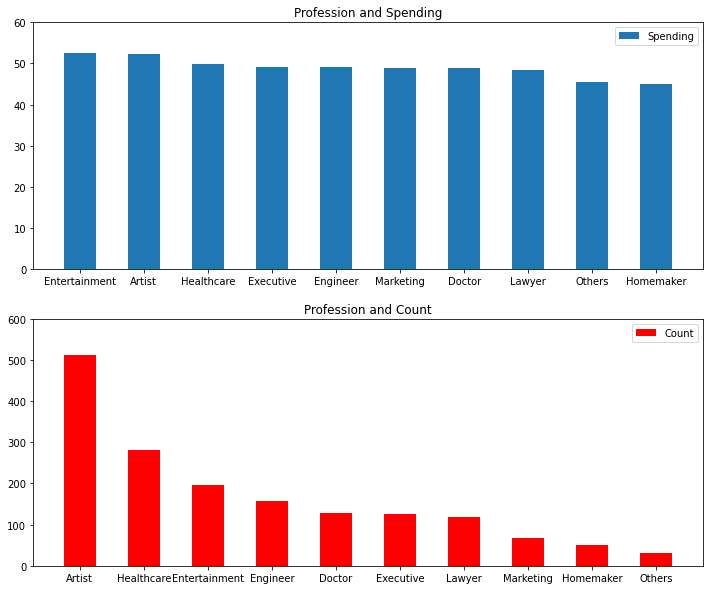

In [113]:
# plot the bar charts
import matplotlib.pyplot as mat
fig, axes = mat.subplots(nrows=2, ncols=1, figsize=(12,10))
axes[0,].set_title("Profession and Spending")
axes[0,].bar(group_spending_sel.index, group_spending_sel["Spending Score (1-100)"], width=0.5)
axes[0,].set_ylim(0,60)
axes[1,].set_title("Profession and Count")
axes[1,].bar(group_count_sel.index, group_count_sel["Count"], width=0.5, color="r")
axes[1,].set_ylim(0, 600)
axes[0,].legend(["Spending"], loc="upper right")
axes[1,].legend(["Count"], loc="upper right")
mat.show(block=None)

In [ ]:
# Insights
"""
The company should carry out targeted marketing for groups with high spending scores and count.
For example, the Artist group has the highest count and the second highest spending score.
"""

In [114]:
# We are going to plot based on Age and Spending

In [115]:
# Based on replaced missing values in DataFrame
# 3. Find the mean spending score based on Age.

In [116]:
# get the summary of spending score
Spending_Score = df_rep[["Spending Score (1-100)"]].describe()
Spending_Score

,Spending Score (1-100)
count,1667.000000
mean,50.333533
std,27.734535
min,0.000000
25%,27.000000
50%,49.000000
75%,74.000000
max,100.000000


In [117]:
# get the mean values
age_group_spending = df_rep.groupby(by=["Age Group"]).mean().reset_index()
age_group_spending 

,Age Group,index,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,36to55,933.770574,934.770574,45.493766,103498.174356,48.620948,4.162095,3.812968
1,<36,852.472289,853.472289,26.631325,103398.442834,51.922892,3.903614,3.513253
2,>55,1067.457109,1068.457109,77.313749,111955.197794,50.365452,4.023502,3.843713


In [118]:
# setup DataFrame for Age Group and Spending Score
age_group_spending_sel = age_group_spending.drop(["CustomerID","Annual Income ($)","Work Experience","Family Size","index","Age"], axis=1)
age_group_spending_sel.index = age_group_spending_sel["Age Group"].tolist()
age_group_spending_sel = age_group_spending_sel.drop(["Age Group"], axis=1)
age_group_spending_sel = age_group_spending_sel.sort_values(by="Spending Score (1-100)", ascending=False)
age_group_spending_sel

,Spending Score (1-100)
<36,51.922892
>55,50.365452
36to55,48.620948


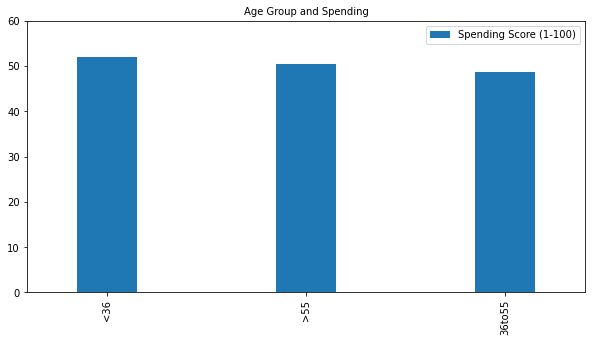

In [119]:
age_group_spending_sel.iloc[0:,0:].plot.bar(subplots=False, figsize=(10,5), fontsize=10, width=0.3)
mat.title(label="Age Group and Spending", fontsize=10)
mat.ylim(0, 60)
mat.legend(fontsize=10, ncol=1)
mat.show()

In [120]:
# Summary:
# The top 2 age-ranges are "below 36" and "above 55".
# The company will be able to plan their marketing campaigns according to the age groups who are the biggest spenders.
# The younger buyers tend to spend the most.

In [121]:
# We are going to plot based on Age Group and Spending

In [122]:
# get the count values
age_group_count = df_rep.groupby(by=["Age Group"]).count().reset_index()
age_group_count

,Age Group,index,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,36to55,401,401,401,401,401,401,401,401,401
1,<36,415,415,415,415,415,415,415,415,415
2,>55,851,851,851,851,851,851,851,851,851


In [123]:
# setup DataFrame for Age Group and Count
age_group_count_sel = age_group_count.drop(["CustomerID","Annual Income ($)","Work Experience","Family Size","index","Age", "Gender","Profession"], axis=1).rename({"Spending Score (1-100)":"Count"},axis=1)
age_group_count_sel.index = age_group_count_sel["Age Group"].tolist()
age_group_count_sel = age_group_count_sel.drop(["Age Group"], axis=1)
age_group_count_sel = age_group_count_sel.sort_values(by="Count", ascending=False)
age_group_count_sel

,Count
>55,851
<36,415
36to55,401


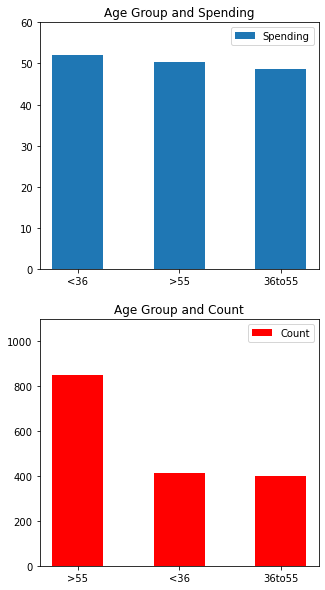

In [128]:
# plot the bar charts
import matplotlib.pyplot as mat
fig, axes = mat.subplots(nrows=2, ncols=1, figsize=(5,10))

axes[0,].set_title("Age Group and Spending")
axes[0,].bar(age_group_spending_sel.index, age_group_spending_sel["Spending Score (1-100)"], width=0.5)
axes[0,].set_ylim(0,60)
axes[1,].set_title("Age Group and Count")
axes[1,].bar(age_group_count_sel.index, age_group_count_sel["Count"], width=0.5, color="r")
axes[1,].set_ylim(0, 1100)
axes[0,].legend(["Spending"], loc="upper right")
axes[1,].legend(["Count"], loc="upper right")

mat.show(block=None)

In [ ]:
# Insights
"""
The company should consider designing products and services that are appealing to the seniors.
For example, in the design of a form for the customers, the font size to be used should be pleasing even in the eyes of the seniors.
The various points of contact of the company should also be friendly to the seniors such that they are not too technologically demanding or overly complex.
"""

In [129]:
# Extra

In [130]:
# We are going to plot based on Gender and Income

In [131]:
# get the mean values
income_gender_mean = df_rep.groupby(by=["Gender"]).mean().reset_index()
income_gender_mean

,Gender,index,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,Female,979.395749,980.395749,56.899798,107433.229276,50.876518,3.934211,3.706478
1,Male,985.244477,986.244477,57.248895,108310.698809,49.543446,4.162003,3.823270


In [132]:
# setup DataFrame for Gender and Income
income_gender_mean_sel = income_gender_mean.drop(["CustomerID","Work Experience","Family Size","index","Age"], axis=1)
income_gender_mean_sel.index = income_gender_mean_sel["Gender"].tolist()
income_gender_mean_sel = income_gender_mean_sel.sort_values(by=["Annual Income ($)"], ascending=False)
income_gender_mean_sel = income_gender_mean_sel.drop(["Gender","Spending Score (1-100)"], axis=1)
income_gender_mean_sel

,Annual Income ($)
Male,108310.698809
Female,107433.229276


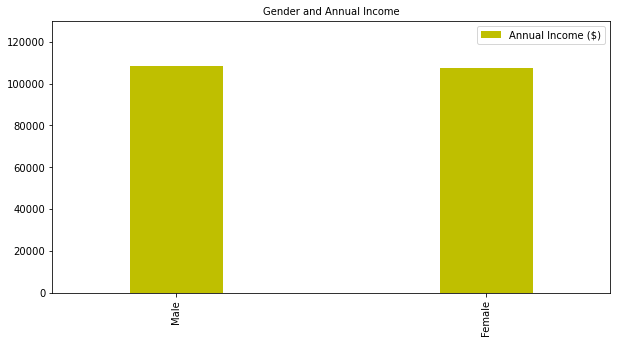

In [133]:
# plot the bar chart
income_gender_mean_sel.iloc[0:,0:].plot.bar(subplots=False, figsize=(10,5), fontsize=10, width=0.3,color="y")
mat.title(label="Gender and Annual Income", fontsize=10)
mat.ylim(0, 130000)
mat.legend(fontsize=10, ncol=1)
mat.show()

In [134]:
df_rep

,index,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Group
0,0,1,Male,19,15000.0,39,Healthcare,1,4,<36
1,1,2,Male,21,35000.0,81,Engineer,3,3,<36
2,2,3,Female,20,86000.0,6,Engineer,1,1,<36
3,3,4,Female,23,59000.0,77,Lawyer,0,2,<36
4,4,5,Female,31,38000.0,40,Entertainment,2,6,<36
...,...,...,...,...,...,...,...,...,...,...
1662,1995,1996,Female,71,184387.0,40,Artist,8,7,>55
1663,1996,1997,Female,91,73158.0,32,Doctor,7,7,>55
1664,1997,1998,Male,87,90961.0,14,Healthcare,9,2,>55
1665,1998,1999,Male,77,182109.0,4,Executive,7,2,>55


In [135]:
df_rep.drop(["index","CustomerID"], axis=1).corr()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Age,1.000000,0.084814,-0.013081,0.015357,0.066722
Annual Income ($),0.084814,1.000000,0.019686,0.095817,0.098740
Spending Score (1-100),-0.013081,0.019686,1.000000,-0.019897,-0.009455
Work Experience,0.015357,0.095817,-0.019897,1.000000,0.013002
Family Size,0.066722,0.098740,-0.009455,0.013002,1.000000
